In [1]:
import pandas as pd

#PEMBACAAN DATASET CENSUS
X = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])
print("Overview data:")
print(X.head())
target = X["50K"]
print("\n\nTARGET: ")
print(target.head())

census = X[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]


print("\n\nDATA: ")
print(census.head())
print()


Overview data:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country     50K  
0          2174             0              40   Unite

In [17]:
#Training dengan KNN , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#iris = datasets.load_iris()

#PEMBACAAN DATASET CENSUS
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])
    
census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]


#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == " <=50K"):
        new.append(0.0)
    else:
        if(item == " >50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
new_data = new_data.values


split_number = 10

#folding
kf = KFold(n_splits=split_number,shuffle= True)
test = kf.split(new_data)
jumlah = 0;
nomorFold = 1
for train_index,test_index in test:
    data_train,data_test = new_data[train_index],new_data[test_index]
    target_train,target_test = new[train_index], new[test_index]
    
    #learning dataset
    knn = KNeighborsClassifier(n_neighbors = 21,p=1)
    knn.fit(data_train,target_train)
    print("fold ke: ",nomorFold)
    #predicting learning data 
    prediction = knn.predict(data_test)
    print('PREDICTION: ',prediction)
    print('TARGET TEST : ',target_test)
    
    #generating confusion matrix
    #conf_matrix = 
    conf = confusion_matrix(target_test,prediction)
    print('Confusion Matrix:')
    print(conf)
    
    #accuracy
    print('\nAccuracy:')
    acc = accuracy_score(target_test,prediction)
    jumlah+=acc
    print(acc*100, "%")
    
    #precision
    print('\nPrecission:')
    prec = precision_score(target_test,prediction)
    print(prec)
    
    #recall
    print('\nRecall:')
    rec = recall_score(target_test,prediction)
    print(rec)
    print('\n')
    nomorFold+=1
    
average = jumlah/10;
print('Rata-rata accuracy: ',average*100,'%\n')

fold ke:  1
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  0. ...,  0.  0.  1.]
Confusion Matrix:
[[2404   31]
 [ 623  199]]

Accuracy:
79.9201719374 %

Precission:
0.865217391304

Recall:
0.242092457421


fold ke:  2
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  1.  0. ...,  0.  0.  0.]
Confusion Matrix:
[[2437   41]
 [ 614  164]]

Accuracy:
79.8832923833 %

Precission:
0.8

Recall:
0.210796915167


fold ke:  3
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  1.]
TARGET TEST :  [ 0.  0.  1. ...,  0.  0.  1.]
Confusion Matrix:
[[2466   39]
 [ 596  155]]

Accuracy:
80.4975429975 %

Precission:
0.798969072165

Recall:
0.206391478029


fold ke:  4
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  1.]
Confusion Matrix:
[[2431   44]
 [ 605  176]]

Accuracy:
80.0675675676 %

Precission:
0.8

Recall:
0.225352112676


fold ke:  5
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  1. ...,  0.  0.  0.]
Confusio

In [3]:
#Training dengan Naive Bayes , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#PEMBACAAN DATASET CENSUS
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])
    
census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]


#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == " <=50K"):
        new.append(0.0)
    else:
        if(item == " >50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
new_data = new_data.values


split_number = 10

#folding
kf = KFold(n_splits=split_number,shuffle= True)
jumlah = 0
nomorFold = 1
for train_index,test_index in kf.split(new_data):
    data_train,data_test = new_data[train_index],new_data[test_index]
    target_train,target_test = new[train_index], new[test_index]
    
    #learning dataset    
    gnb = GaussianNB()
    gnb.fit(data_train,target_train)
    print("fold ke: ",nomorFold)
    #predicting learning data 
    prediction = gnb.predict(data_test)
    print('PREDICTION: ',prediction)
    print('TARGET TEST : ',target_test)
    
    #generating confusion matrix
    #conf_matrix = 
    conf = confusion_matrix(target_test,prediction)
    print('Confusion Matrix:')
    print(conf)
    
    #accuracy
    print('\nAccuracy:')
    acc = accuracy_score(target_test,prediction)
    jumlah+=acc
    print(acc*100,'%')
    
    #precision
    print('\nPrecission:')
    prec = precision_score(target_test,prediction)
    print(prec)
    
    #recall
    print('\nRecall:')
    rec = recall_score(target_test,prediction)
    print(rec)
    print('\n')
    nomorFold+=1
    
average = jumlah/10;
print('Rata-rata accuracy: ',average*100,'%\n')

fold ke:  1
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  1.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  1.]
Confusion Matrix:
[[2351  116]
 [ 545  245]]

Accuracy:
79.7052502303 %

Precission:
0.678670360111

Recall:
0.310126582278


fold ke:  2
PREDICTION:  [ 1.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  0. ...,  1.  0.  0.]
Confusion Matrix:
[[2347  117]
 [ 556  236]]

Accuracy:
79.3304668305 %

Precission:
0.668555240793

Recall:
0.29797979798


fold ke:  3
PREDICTION:  [ 1.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  0. ...,  0.  1.  0.]
Confusion Matrix:
[[2368  118]
 [ 510  260]]

Accuracy:
80.7125307125 %

Precission:
0.687830687831

Recall:
0.337662337662


fold ke:  4
PREDICTION:  [ 0.  0.  1. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  0.]
Confusion Matrix:
[[2308  147]
 [ 546  255]]

Accuracy:
78.7162162162 %

Precission:
0.634328358209

Recall:
0.318352059925


fold ke:  5
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  0.  1. ..., 

In [1]:
#Training dengan Decision Tree , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn import tree
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#PEMBACAAN DATASET CENSUS
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])
    
census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]


#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == " <=50K"):
        new.append(0.0)
    else:
        if(item == " >50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
new_data = new_data.values


split_number = 10

#folding
kf = KFold(n_splits=split_number,shuffle= True)
jumlah=0
nomorFold = 1
for train_index,test_index in kf.split(new_data):
    data_train,data_test = new_data[train_index],new_data[test_index]
    target_train,target_test = new[train_index], new[test_index]
    
    #learning dataset    
    clf = tree.DecisionTreeClassifier(criterion = "entropy",max_depth=10)
    clf.fit(data_train,target_train)
    print("fold ke ",nomorFold)
    #predicting learning data 
    prediction = clf.predict(data_test)
    print('PREDICTION: ',prediction)
    print('TARGET TEST : ',target_test)
    
    #generating confusion matrix
    #conf_matrix = 
    conf = confusion_matrix(target_test,prediction)
    print('Confusion Matrix:')
    print(conf)
    
    #accuracy
    print('\nAccuracy:')
    acc = accuracy_score(target_test,prediction)
    jumlah+=acc
    print(acc*100,'%')
    
    #precision
    print('\nPrecission:')
    prec = precision_score(target_test,prediction)
    print(prec)
    
    #recall
    print('\nRecall:')
    rec = recall_score(target_test,prediction)
    print(rec)
    print('\n')
    nomorFold+=1

average = jumlah/10;
print('Rata-rata accuracy: ',average*100,'%\n')

fold ke  1
PREDICTION:  [ 0.  0.  0. ...,  0.  0.  1.]
TARGET TEST :  [ 0.  0.  0. ...,  0.  0.  1.]
Confusion Matrix:
[[2310  131]
 [ 321  495]]

Accuracy:
86.122198342 %

Precission:
0.790734824281

Recall:
0.606617647059


fold ke  2
PREDICTION:  [ 0.  0.  1. ...,  0.  0.  1.]
TARGET TEST :  [ 0.  0.  1. ...,  0.  1.  1.]
Confusion Matrix:
[[2316  130]
 [ 351  459]]

Accuracy:
85.2272727273 %

Precission:
0.779286926995

Recall:
0.566666666667


fold ke  3
PREDICTION:  [ 0.  1.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 0.  1.  0. ...,  0.  1.  0.]
Confusion Matrix:
[[2349  118]
 [ 370  419]]

Accuracy:
85.0122850123 %

Precission:
0.780260707635

Recall:
0.531051964512


fold ke  4
PREDICTION:  [ 1.  0.  0. ...,  0.  0.  0.]
TARGET TEST :  [ 1.  1.  0. ...,  0.  0.  0.]
Confusion Matrix:
[[2356  100]
 [ 367  433]]

Accuracy:
85.6572481572 %

Precission:
0.812382739212

Recall:
0.54125


fold ke  5
PREDICTION:  [ 0.  0.  0. ...,  1.  0.  0.]
TARGET TEST :  [ 0.  0.  0. ...,  1.  0.  0.]

In [ ]:
#Training dengan MLP , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#PEMBACAAN DATASET CENSUS
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",", header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"])
    
census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]


#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == " <=50K"):
        new.append(0.0)
    else:
        if(item == " >50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
new_data = new_data.values


split_number = 10

#folding
kf = KFold(n_splits=split_number,shuffle= True)
jumlah = 0
nomorFold = 1
for train_index,test_index in kf.split(new_data):
    data_train,data_test = new_data[train_index],new_data[test_index]
    target_train,target_test = new[train_index], new[test_index]
    
    #learning dataset    
    clf = MLPClassifier(activation='logistic',max_iter = 1000,solver='lbfgs',hidden_layer_sizes=(150,2),verbose=True)
    clf.fit(data_train,target_train)
    print("fold ke: ",nomorFold)
    #predicting learning data 
    prediction = clf.predict(data_test)
    print('PREDICTION: ',prediction)
    print('TARGET TEST : ',target_test)
    
    #generating confusion matrix
    #conf_matrix = 
    conf = confusion_matrix(target_test,prediction)
    print('Confusion Matrix:')
    print(conf)
    
    #accuracy
    print('\nAccuracy:')
    acc = accuracy_score(target_test,prediction)
    jumlah+=acc
    print(acc*100,'%')
    
    #precision
    print('\nPrecission:')
    prec = precision_score(target_test,prediction)
    print(prec)
    
    #recall
    print('\nRecall:')
    rec = recall_score(target_test,prediction)
    print(rec)
    print('\n')
    nomorFold+=1

average = jumlah/10;
print('Rata-rata accuracy: ',average*100,'%\n')

In [5]:
#Training dengan Decision Tree , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn import tree
import pandas as pd
from sklearn.externals import joblib
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#PEMBACAAN DATASET CENSUS UNTUK TRAINING
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.data.txt', sep=",\s",header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"], engine='python')

#add & uncomment these two if you want to ignore the ? value
#, na_values=["?"]
#cen.dropna(inplace=True)

census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]


#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == "<=50K"):
        new.append(0.0)
    else:
        if(item == ">50K"):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            
            
new_data = pd.get_dummies(census_data)
list_census = (list(new_data.columns.values))
print(new_data)
new_data = new_data.values



#learning dataset    
clf = tree.DecisionTreeClassifier(criterion = "entropy",max_depth=10)
clf.fit(new_data,new)

print(clf)

joblib.dump(clf,'clf.pkl') # menyimpan model ke file eksternal
print('Model Saved!')

huehue = joblib.load('clf.pkl') # membaca model dari file eksternal
print('Model Loaded!')
print(huehue)

print(new_data)

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
5       37  284582             14             0             0              40   
6       49  160187              5             0             0              16   
7       52  209642              9             0             0              45   
8       31   45781             14         14084             0              50   
9       42  159449             13          5178             0              40   
10      37  280464             10             0             0              80   
11      30  141297          

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Model Saved!
Model Loaded!
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[    39  77516     13 ...,      1      0      0]
 [    50  83311     13 ...,      1      0      0]
 [    38 215646      9 ...,      1      0      0]
 ..., 
 [    58 151910      9 ...,      1      0      0]
 [    22 201490      9 ...,      1      0      0]
 [    52 28792

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       25  226802              7             0             0              40   
1       38   89814              9             0             0              50   
2       28  336951             12             0             0              40   
3       44  160323             10          7688             0              40   
4       18  103497             10             0             0              30   
5       34  198693              6             0             0              30   
6       29  227026              9             0             0              40   
7       63  104626             15          3103             0              32   
8       24  369667             10             0             0              40   
9       55  104996              4             0             0              10   
10      65  184454              9          6418             0              40   
11      36  212465          

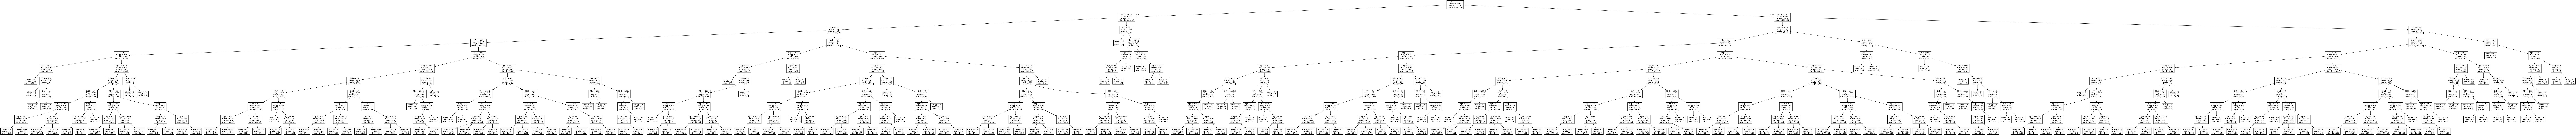

In [6]:
#Training dengan Decision Tree , kFold 10 fold , metrics, confusion matrix 
import numpy as np
from sklearn import datasets
from sklearn import tree
import pandas as pd
from sklearn.externals import joblib
from sklearn.datasets import load_svmlight_files
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import graphviz
from graphviz import Source
from IPython.display import SVG

#PEMBACAAN DATASET CENSUS UNTUK TESTING
cen = pd.read_csv('DatasetEskperimen/CensusIncome/CencusIncome.test.txt', sep=",\s",header=None, names=["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"], engine='python')

#add & uncomment these two if you want to ignore the ? value
#, na_values=["?"]
#cen.dropna(inplace=True)

census_data = cen[["age", "workclass", "fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"]]
census_target = cen["50K"]
#print(census_target)

#changing target into float 0 and 1
new = []

for index, item in enumerate(census_target):
    if (item == "<=50K."):
        new.append(0.0)
    else:
        if(item == ">50K."):
            new.append(1.0)
        else:
            new.append(2.0)

new = np.array(new)            

new_data = pd.get_dummies(census_data)

print(new_data)

#Fixing unbalanced column problem
list_target = (list(new_data.columns.values))

empty_list = (list(set(list_census) - set(list_target)))

while (len(empty_list) > 0):
    new_data[empty_list.pop()] = 0

new_data = new_data.values

clf = joblib.load('clf.pkl') # membaca model dari file eksternal
print('Model Loaded!')



#predicting learning data 
prediction = clf.predict(new_data)
print('PREDICTION: ',prediction)
print('TARGET TEST : ',new)

#lihat akurasi
print('\nAccuracy:')
acc = accuracy_score(new,prediction)
print(acc*100,'%')

graph = Source( tree.export_graphviz(clf, out_file=None))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)